## Ejercicios de pair programming 30 enero: Ajuste

In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Info columnas
|Column| Type | Description |
|-------|--------------|-------------|
|distance_from_home| float64|	The distance from home where the transaction happened
|distance_from_last_transaction| float64|	The distance from last transaction happened.
|ratio_to_median_purchase_price| float64|	Ratio of purchased price transaction to median purchase price.
|repeat_retailer| float64|	Is the transaction happened from same retailer. 
|used_chip| float64|	Is the transaction through chip (credit card)
|used_pin_number| float64|	Is the transaction happened by using PIN number. 
|online_order | float64| Is the transaction an online order.
|fraud | float64| Is the transaction fraudulent.   

Enlace del *DataFrame* *[card_transdata](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)*

In [4]:
df = pd.read_csv("../datos/card_transdata_esta.csv", index_col = 0)
df.head(2)

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1,1,0,0,0,0.477882,-0.182849,0.043491
1,1,0,0,0,0,-0.241607,-0.188094,-0.189300


In [5]:
balanceado = pd.read_csv("../datos/card_transdata_balanceado.csv", index_col = 0)
balanceado.head(2)

,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
466843,1,0,0,0,0.254951,-0.179932,-0.437719,0
573627,1,0,0,1,-0.363231,-0.153628,-0.494108,0


--- 

### Variables estandarizadas

---

In [10]:
#Separamos las variables predictoras de la respuesta
X1 = df.drop("fraud", axis = 1)
y1 = df["fraud"]

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42) #Separamos el train y el test para nuestro modelo

In [12]:
# definimos la regresión logistica
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

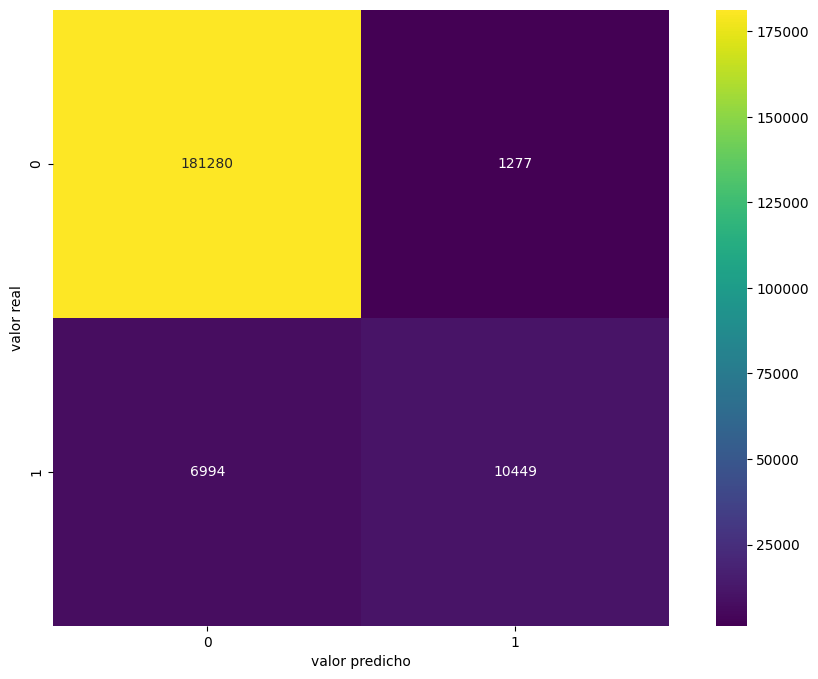

In [13]:
# MATRIZ DE CONFUSIÓN PARA LOS DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

0 = NO ES FRAUDE
1 = ES FRAUDE

En la matriz de correlación podemos ver que tenemos 181.280 verdaderos negativos, en nuestro caso que no eran fraude y predice que no lo es.

Por otro lado, tenemos 10.449 verdaderos positivos, es decir que son fraude y el modelo predice que lo son. 

Hay 1.277 falsos positivos, no son fraude, pero el modelo predice que si lo es.

Por último hay 6.994 falsos negativos, es decir, son fraude pero el modelo no los detecta. 

Consideramos que nuestro modelo no es del todo fiable, sobretodo porque detecta como negativos muchos casos que verdaderamente son positivos.

---

### Datos estandarizados y balanceados

---

In [14]:
#Separamos nuestras variables 
X2 = balanceado.drop("fraud", axis = 1)
y2 = balanceado["fraud"]

In [15]:
#Separamos el train y el test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [16]:
# definimos la regresión logistica
log_reg_bal = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_bal.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_bal.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_bal.predict(x_test2)

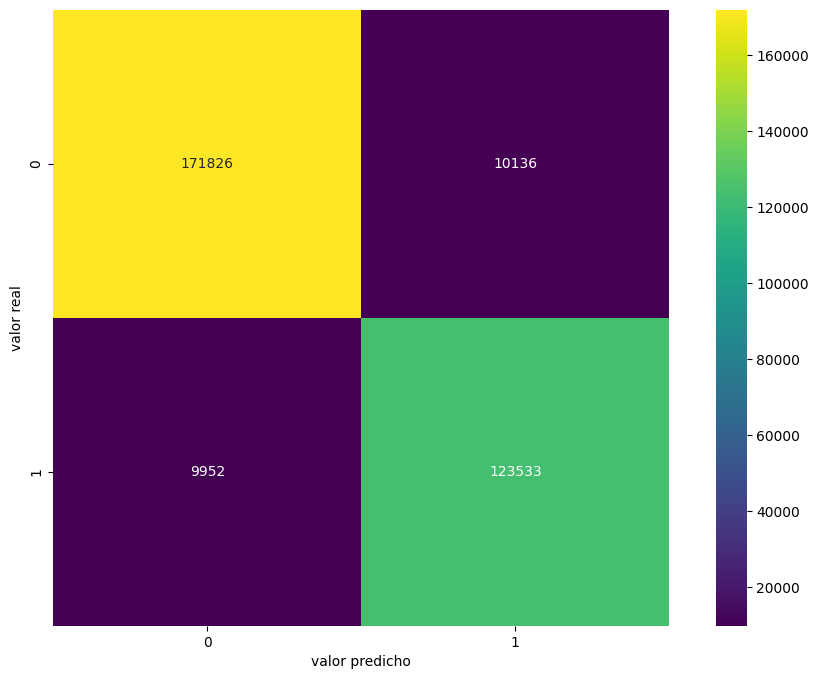

In [17]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS Y BALANCEADOS

mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

0 = NO ES FRAUDE
1 = ES FRAUDE

En la matriz de correlación podemos ver que tenemos 171.670 verdaderos negativos, en nuestro caso que no eran fraude y predice que no lo es.

Por otro lado, tenemos 123.550 verdaderos positivos, es decir que son fraude y el modelo predice que lo son. 

Hay 10.168 falsos positivos, no son fraude, pero el modelo predice que si lo es.

Por último hay 10.157 falsos negativos, es decir, son fraude pero el modelo no los detecta. 

Podemos ver que con nuestros datos balanceados es un poco peor, ya que tanto los falsos positivos como los falsos negativos aumentan bastante.